<center><h1> TITANIC </h1></center>

**Some Details About Data**
- The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Titanic</p>

<img src="https://camo.githubusercontent.com/51fe0e93862af83c7b5ae6d3c4c266c701d52917363ab9bc9d111adda275de66/68747470733a2f2f696d61676573382e616c706861636f646572732e636f6d2f3430352f3430353032392e6a7067">

In this project, I will be performing a supervised Logestic Regression of data on the Titanic. Titanic is the practice of separating Peoples 2 Groups .
Survied [1]
Unsurvied [0] 


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA CLEANING](#3)
    
* [4. DATA PREPROCESSING](#4)   
    
* [5. RandomForest Classifier](#5) 
          
* [6. APPLYING MLPCLASSIFIER](#6)

* [7. PROFILING](#7)
    
* [8. CONCLUSION](#8)
    
* [9. END](#9)


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

In [1]:
import numpy as np            
import pandas as pd                   
from sklearn.metrics import confusion_matrix ,classification_report , precision_score , recall_score , f1_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler 
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.simplefilter(action='ignore')

<a id="2"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>

In [2]:
#Loading the dataset
data = pd.read_csv('D:\\Array Diploma\\Data\\train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="3"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>

**From Data I Need Know Some Information**
1. Know Shape Of Data 
2. Data Columns Names 
3. Data Information
4. Describing Data
5. Check Number Unique For Data
6. Check Null Value
7. Data Visualization
8. Drop Null Value 
9. Filnan Value In Columns

In [3]:
print('The Shape Of Data Is ==> ',data.shape)

The Shape Of Data Is ==>  (891, 12)


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
## printing total numbers of Unique value in the dataframe. 
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**From the above output, we can conclude and note that:**

* There are missing values (Null) in CREDIT_LIMIT , MINIMUM_PAYMENTS Columns
* There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later. 

First of all, for the missing values, I am simply going to drop the rows that have missing income values. 

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
missing_count= data.isnull().sum()  #the count of missing values
value_count  = data.isnull().count()#the count of all values

In [10]:
missing_percentage= round(missing_count/value_count*100,2)#the percentage of missing values
missing_df= pd.DataFrame({'count': missing_count,'percentage':missing_percentage })#create a dataframe
print(missing_df)

             count  percentage
PassengerId      0        0.00
Survived         0        0.00
Pclass           0        0.00
Name             0        0.00
Sex              0        0.00
Age            177       19.87
SibSp            0        0.00
Parch            0        0.00
Ticket           0        0.00
Fare             0        0.00
Cabin          687       77.10
Embarked         2        0.22


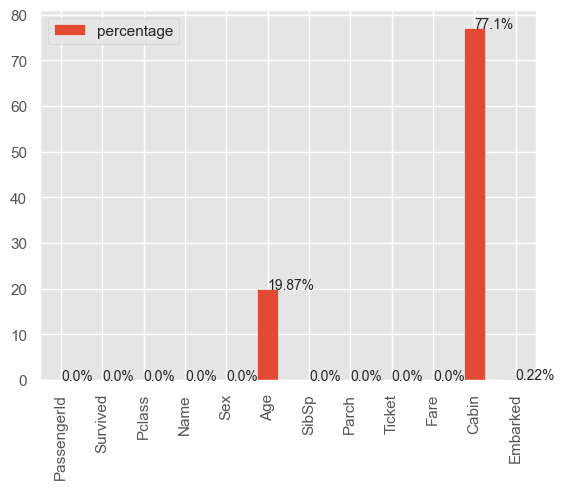

In [11]:
plt.style.use('ggplot')
barchart=missing_df.plot.bar(y= 'percentage')
for index, percentage in enumerate(missing_percentage):
    barchart.text(index,percentage, str(percentage)+"%")

In [12]:
data.dropna(how='all',inplace=True)

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Display DataFrame Information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


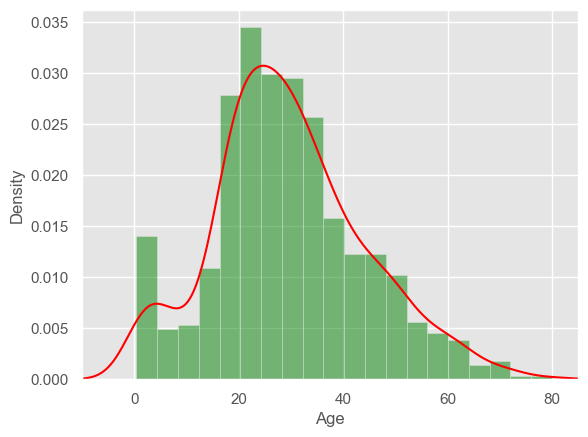

In [15]:
# percent of missing "Age" 
#print('Percent of missing "Age" records is ==>  %.2f%%' %((data['age'].isnull().sum()/data.shape[0])*100))
ax = data["Age"].hist(bins=20, density=True, stacked=True, color='green', alpha=0.5)
data["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

1. Check The Mean & Median Value For AGE Column
2. Will be Replaced The NAN Value with the closest, most frequently occurring value in this column
* When Check The Mean = 29.88 , and median is = 28.00

In [16]:
# mean age
print('The mean of "Age" is ==> %.2f' %(data["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is ==> %.2f' %(data["Age"].median(skipna=True)))
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is ==> %.2f%%' %((data['Cabin'].isnull().sum()/data.shape[0])*100))

The mean of "Age" is ==> 29.70
The median of "Age" is ==> 28.00
Percent of missing "Cabin" records is ==> 77.10%


Percent of missing "Embarked" records is ==>  0.22%
Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


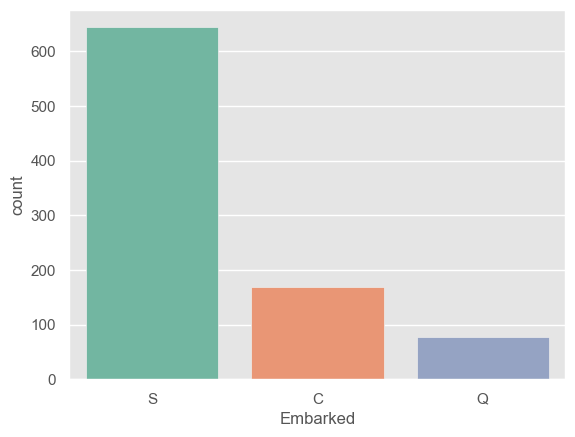

In [17]:
# Show Missing Values For Embarked Column 
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is ==>  %.2f%%' %((data['Embarked'].isnull().sum()/data.shape[0])*100))
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(data['Embarked'].value_counts())
sns.countplot(x='Embarked', data=data, palette='Set2')
plt.show()

In [18]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data. 

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

* create categorical variables & Drop Some Columns From Data
* Check Data Types
* Fill NAN Value For Fare Column By Using Median 

In [19]:
data=pd.get_dummies(data, columns=["Pclass","Embarked","Sex"])

In [20]:
data

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,0,1,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,0,0,1,1,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1,0,0,1,1,0
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,1,0,0,0,1


In [21]:
data.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male'],
      dtype='object')

In [22]:
data.drop('Name', axis=1, inplace=True)
data.drop('Ticket', axis=1, inplace=True)
data.drop('Cabin', axis=1, inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Pclass_1     891 non-null    uint8  
 7   Pclass_2     891 non-null    uint8  
 8   Pclass_3     891 non-null    uint8  
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
 12  Sex_female   891 non-null    uint8  
 13  Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(8)
memory usage: 48.9 KB


**Convert All Data From INT34 & UNIT8 TO Float64**

In [24]:
data= data.astype('float64')

In [25]:
data

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1.0,0.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.0,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,5.0,0.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,27.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
887,888.0,1.0,19.0,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
888,889.0,0.0,NaN,1.0,2.0,23.4500,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
889,890.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [26]:
#Fill NAN Value For Fare Column By Using Median 
print('The Mean For Fare Column Is ==> ',data['Fare'].mean()) # 36.68608028708134
print('The Median For Fare Column Is ==> ',data['Fare'].median()) #15.75
print('The Mode For Fare Column Is ==> ',data['Fare'].mode()) # 0    13.0
print('***'*30)
#Fill Nan Value 
data['Fare'] = data['Fare'].fillna(value = data['Fare'].median())

The Mean For Fare Column Is ==>  32.204207968574636
The Median For Fare Column Is ==>  14.4542
The Mode For Fare Column Is ==>  0    8.05
Name: Fare, dtype: float64
******************************************************************************************


In [27]:
# mean age
print('The mean of "Age" is ==> %.2f' %(data["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is ==> %.2f' %(data["Age"].median(skipna=True)))
#print('Percent of missing "Cabin" records is ==> %.2f%%' %((data['Cabin'].isnull().sum()/data.shape[0])*100))
data.dropna(subset=['Age'],inplace=True)

The mean of "Age" is ==> 29.70
The median of "Age" is ==> 28.00


In [28]:
data.dropna(how='all',inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_female     0
Sex_male       0
dtype: int64

In [29]:
data = data.astype('float64')

In [30]:
data

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1.0,0.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.0,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,5.0,0.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886.0,0.0,39.0,0.0,5.0,29.1250,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
886,887.0,0.0,27.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
887,888.0,1.0,19.0,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
889,890.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">APPLYING RANDOMFOREST CLASSIFIER</p>

In [35]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
x = data.iloc[:,2:]
y = data.iloc[:,1]
print('The Shape Of X Data Is ==> ',x.shape)
print('The Shape Of Y Data Is ==> ',y.shape)
# Splitting Data To ( Train - Test )
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print('****'*30)
RF_Model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=2,n_jobs=-1,random_state=33)
RF_Model.fit(x_train,y_train)
#Calculating Details
print('RandomForestClassifierModel Train Score is : ',RF_Model.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is  : ',RF_Model.score(x_test, y_test))
print('RandomForestClassifierModel features importances are : ' ,list(RF_Model.feature_importances_))
print('----------------------------------------------------')
#Calculating Prediction
y_pred = RF_Model.predict(x_test)
y_pred_prob = RF_Model.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' ,list(y_pred[:10]))
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , list(y_pred_prob[:10]))

The Shape Of X Data Is ==>  (714, 12)
The Shape Of Y Data Is ==>  (714,)
************************************************************************************************************************
RandomForestClassifierModel Train Score is :  0.7758318739054291
RandomForestClassifierModel Test Score is  :  0.8041958041958042
RandomForestClassifierModel features importances are :  [0.03706213099290203, 0.00880346224153777, 0.02664128248065587, 0.10920843827322983, 0.08497196778502895, 0.015211119146336494, 0.13363082568529985, 0.01630599321501415, 0.002414480350081306, 0.003858994625962989, 0.2438761547038889, 0.31801515050006185]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [array([0.46777275, 0.53222725]), array([0.25692968, 0.74307032]), array([0.48621323, 0.51378677]), array([0.71492209, 0.28507791]), array

In [36]:
CM = confusion_matrix(y_test,y_pred)
print('\t\t The Confusion Matrix Is : \n',CM)
print('****'*30)
#Calculate The Precision And Recall And F1Score 
# 1. Precision Score 
Precision = precision_score(y_test,y_pred,average='macro')
#2. Recall Score 
Recall = recall_score(y_test,y_pred,average='macro')
#3. F1 Score
F1_Score = f1_score(y_test,y_pred,average='micro')
print('The Precision Score Is ==> ',Precision)
print('The Recall Score Is ==> ',Recall)
print('The Accuracy Of Algorithm By Using F1_Score Is ==> ',F1_Score)
print('****'*30)
#Roc Curve 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
print('The Value Of False Positive Rate (specificity) Is ==> ',fpr)
print('The Value Of True Positive Rate (sensitivity) Is ==> ',tpr)
print('The Value Of Threshold Rate Is ==> ',thresholds)

		 The Confusion Matrix Is : 
 [[68 11]
 [17 47]]
************************************************************************************************************************
The Precision Score Is ==>  0.8051724137931034
The Recall Score Is ==>  0.7975672468354431
The Accuracy Of Algorithm By Using F1_Score Is ==>  0.8041958041958042
************************************************************************************************************************
The Value Of False Positive Rate (specificity) Is ==>  [0.         0.40559441 1.        ]
The Value Of True Positive Rate (sensitivity) Is ==>  [nan nan nan]
The Value Of Threshold Rate Is ==>  [2. 1. 0.]


<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">APPLYING MLPCLASSIFIER</p>


In [37]:
from sklearn.neural_network import MLPClassifier
x2 = data.iloc[:,2:]
y2 = data.iloc[:,1]
print('The Shape Of X Data Is ==> ',x2.shape)
print('The Shape Of Y Data Is ==> ',y2.shape)
# Splitting Data To ( Train - Test )
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.2,random_state=0)
#Applying Neural Networks Classifier
print('***'*30)
NN_Model = MLPClassifier(hidden_layer_sizes=(155,7),activation='relu',max_iter=50000,alpha=0.02,tol=0.00003,)
NN_Model.fit(x2_train,y2_train)
#Calculating Details
print('MLPClassifierModel Train Score is ==> ' , NN_Model.score(x2_train, y2_train))
print('MLPClassifierModel Test Score is  ==> '  , NN_Model.score(x2_test, y2_test))
print('MLPClassifierModel loss is        ==> '  , NN_Model.loss_)
print('MLPClassifierModel No. of iterations is ==>  ' , NN_Model.n_iter_)
print('MLPClassifierModel No. of layers is ==>  ' , NN_Model.n_layers_)
print('MLPClassifierModel last activation is ==>  ' , NN_Model.out_activation_)

The Shape Of X Data Is ==>  (714, 12)
The Shape Of Y Data Is ==>  (714,)
******************************************************************************************
MLPClassifierModel Train Score is ==>  0.8423817863397548
MLPClassifierModel Test Score is  ==>  0.7762237762237763
MLPClassifierModel loss is        ==>  0.3402022679444069
MLPClassifierModel No. of iterations is ==>   275
MLPClassifierModel No. of layers is ==>   4
MLPClassifierModel last activation is ==>   logistic


In [38]:
#Calculating Prediction
y_pred2 = NN_Model.predict(x2_test)
y_pred_prob2 = NN_Model.predict_proba(x2_test)
print('Real Value for MLPClassifier is   ==> '       , list(y2_test[:50]))
print('Predicted Value for MLPClassifierModel is : ' , list(y_pred2[:50]))
print('Prediction Probabilities Value for MLPClassifierModel is : ' , y_pred_prob2[:10])

Real Value for MLPClassifier is   ==>  [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
Predicted Value for MLPClassifierModel is :  [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Prediction Probabilities Value for MLPClassifierModel is :  [[0.46150218 0.53849782]
 [0.01499597 0.98500403]
 [0.00532985 0.99467015]
 [0.94399878 0.05600122]
 [0.50321629 0.49678371]
 [0.93964715 0.06035285]
 [0.94508444 0.05491556]
 [0.85858066 0.14141934]
 [0.78425931 0.21574069]
 [0.71247298 0.28752702]]


In [39]:
CM2 = confusion_matrix(y2_test,y_pred2)
print('\t\t The Confusion Matrix Is : \n',CM2)
print('****'*30)
#Calculate The Precision And Recall And F1Score 
# 1. Precision Score 
Precision2 = precision_score(y2_test,y_pred2,average='binary')
#2. Recall Score 
Recall2 = recall_score(y2_test,y_pred2,average='macro')
#3. F1 Score
F1_Score2 = f1_score(y2_test,y_pred2,average='micro')
print('The Precision Score Is ==> ',Precision2)
print('The Recall Score Is ==> ',Recall2)
print('The Accuracy Of Algorithm By Using F1_Score Is ==> ',F1_Score2*100)
print('****'*30)
#Roc Curve 
from sklearn.metrics import roc_curve
fpr2, tpr2, thresholds2 = roc_curve(y2_test, y_pred2, pos_label=2)
print('The Value Of False Positive Rate (specificity) Is ==> ',fpr2)
print('The Value Of True Positive Rate (sensitivity) Is ==> ',tpr2)
print('The Value Of Threshold Rate Is ==> ',thresholds2)

		 The Confusion Matrix Is : 
 [[69 10]
 [22 42]]
************************************************************************************************************************
The Precision Score Is ==>  0.8076923076923077
The Recall Score Is ==>  0.7648338607594937
The Accuracy Of Algorithm By Using F1_Score Is ==>  77.62237762237763
************************************************************************************************************************
The Value Of False Positive Rate (specificity) Is ==>  [0.         0.36363636 1.        ]
The Value Of True Positive Rate (sensitivity) Is ==>  [nan nan nan]
The Value Of Threshold Rate Is ==>  [2. 1. 0.]


<a id="9"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSION</p>

* 1. (Random Forest Classifier) The Accuracy Of Algorithm By Using F1_Score Is ==>  0.8041958041958042
* 2. (MLP_CLASSIFIER) The Accuracy Of Algorithm By Using F1_Score Is ==>  77.62237762237763
* **Conclusion: The Best Score When Used MLP_Classifier.** 

<a id="10"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>